Limpieza de datos de la tabla facturas de compra "InvoicePurchases12312016"

In [19]:
# Importo las librerias que voy a usar

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

Carga del dataset

In [2]:
# Leo el dataset de mi disco local correspondiente a la tabla "InvoicePurchases12312016"

df_ruta_data= r'C:\Users\fel-p\Documents\DATA_ANALITYCS_Henry\PF\archive (2)\InvoicePurchases12312016.csv'

df_facturas_compra= pd.read_csv(df_ruta_data)

# Compruebo que se haya cargado correctamente, verificando las 5 primeras filas
print(df_facturas_compra.head())



   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47      NaN  
1  2015-12-22  2016-02-21        15     140.55     8.57      NaN  
2  2015-12-24  2016-02-16         5     106.60     4.61      NaN  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20      NaN  
4  2015-12-24  2016-02-12      1935   15527.25   429.20      NaN  


Limpieza de datos

In [3]:
# Manejo de  valores faltantes

# Cuantas filas quedarían si elimino todas las filas con NaN
print("Filas que quedarían si elimino las filas con NaN:", len(df_facturas_compra.dropna()))

# conteo de NaN por columna
print("Filas con valores NaN en cada columna  \n", df_facturas_compra.isna().sum())

Filas que quedarían si elimino las filas con NaN: 374
Filas con valores NaN en cada columna  
 VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64


<Figure size 1000x600 with 0 Axes>

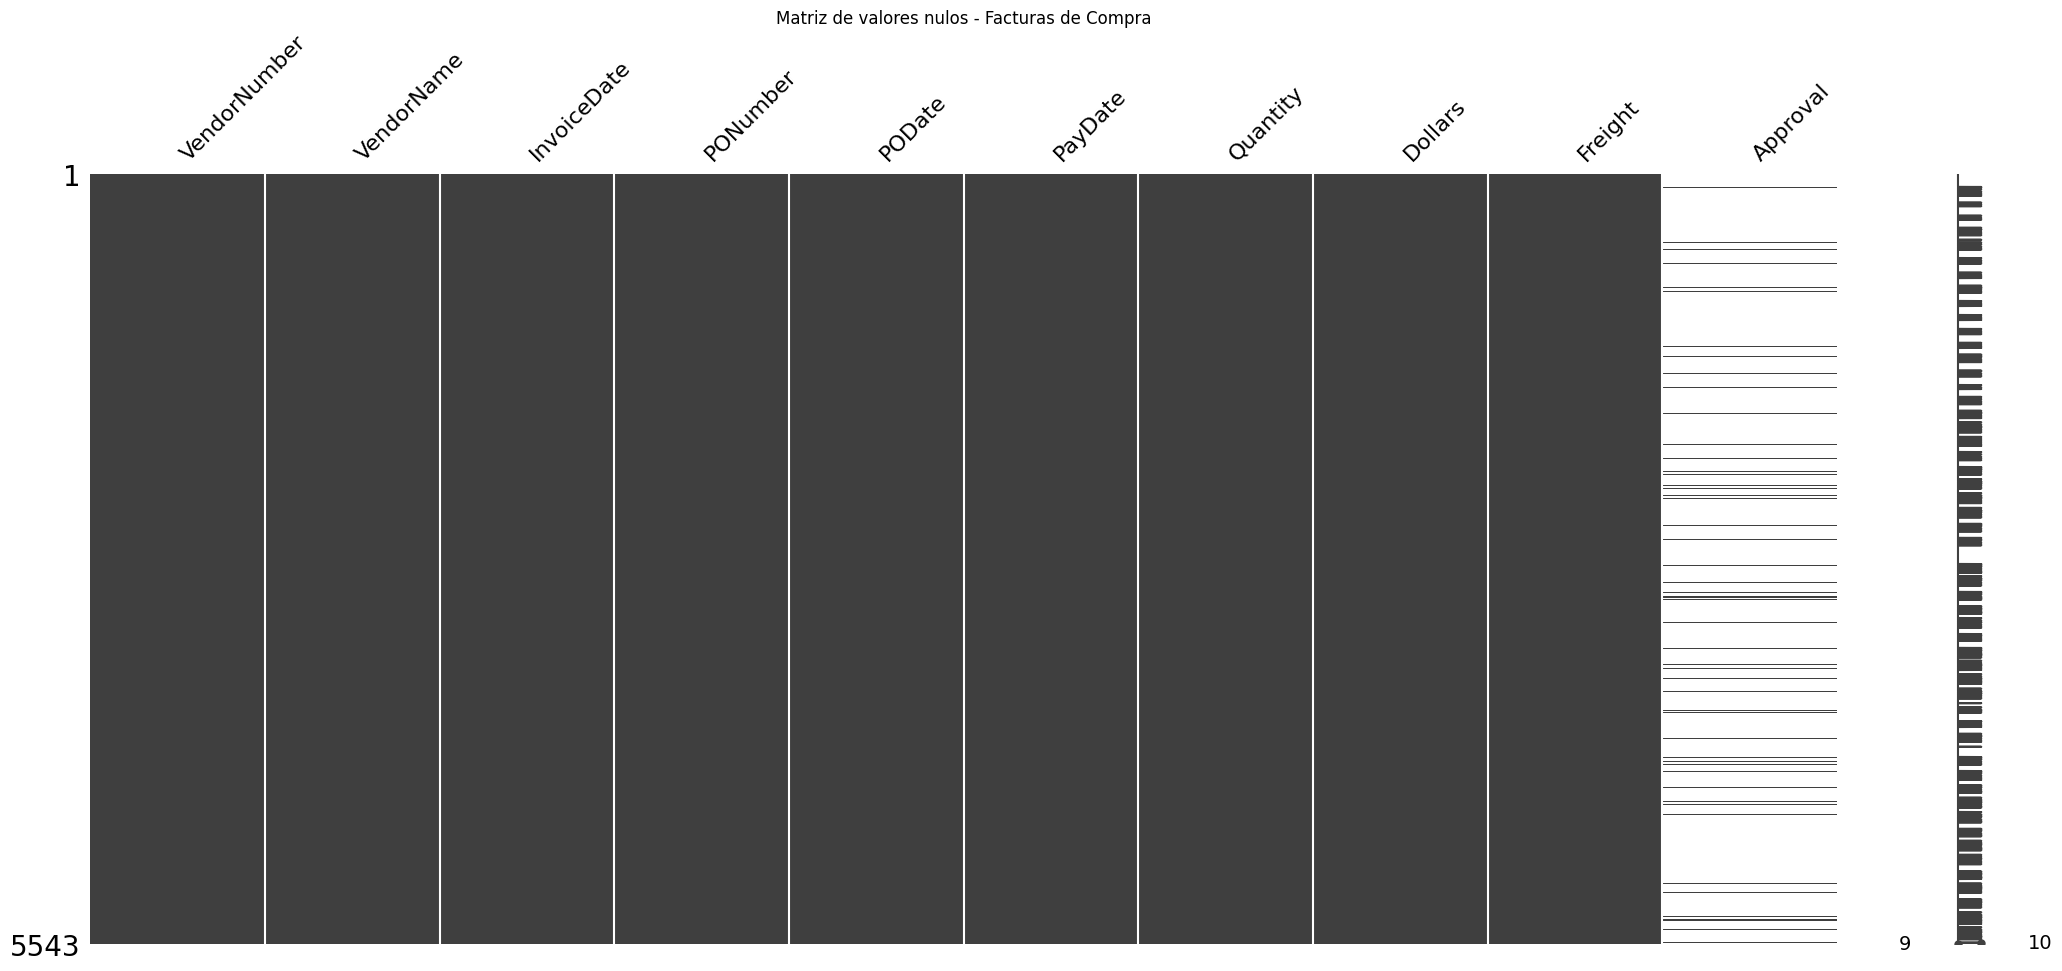

In [4]:
# Hago la matriz de nulos te permite visualizar de forma rápida dónde están los valores faltantes 
plt.figure(figsize=(10,6))
msno.matrix(df_facturas_compra)
plt.title("Matriz de valores nulos - Facturas de Compra")
plt.show()

In [5]:
# Por análisis determinamos que las columnas que aparecen vacias en Approval son facturas sin aprovar
# por lo que completamos los campos con "pending"

df_facturas_compra ["Approval"]= df_facturas_compra["Approval"].fillna("pendign")

# conteo de NaN por columna
print("Filas con valores NaN en cada columna  \n", df_facturas_compra.isna().sum())

Filas con valores NaN en cada columna  
 VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64


Ajuste al tipo de dato

In [6]:
#Validar el tipo de dato, para encontrar incosistencias
print(df_facturas_compra.dtypes)

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object


In [7]:
# Lo primero es el parseo de las columnas de fecha

fechas=["InvoiceDate","PayDate","PODate"]


In [8]:
#Convierto a datetime para poder cambiar el formato a dd-mm-yyyy

for col in fechas:
    df_facturas_compra[col] = pd.to_datetime(df_facturas_compra[col], errors='coerce')

#df_facturas_compra [fechas]= pd.to_datetime(df_facturas_compra[fechas])

print(df_facturas_compra[fechas].dtypes)

InvoiceDate    datetime64[ns]
PayDate        datetime64[ns]
PODate         datetime64[ns]
dtype: object


In [9]:
# Ahora busco el formato en el que esta la fecha 
print(df_facturas_compra[fechas].head())

# cambio de YYYY-MM-DD a DD-MM_YYYY
for col in fechas:
    df_facturas_compra[col] = df_facturas_compra[col].dt.strftime("%d-%m-%Y")

# Compruebo la modificación
print(df_facturas_compra[fechas].head())



  InvoiceDate    PayDate     PODate
0  2016-01-04 2016-02-16 2015-12-21
1  2016-01-07 2016-02-21 2015-12-22
2  2016-01-09 2016-02-16 2015-12-24
3  2016-01-12 2016-02-05 2015-12-20
4  2016-01-07 2016-02-12 2015-12-24
  InvoiceDate     PayDate      PODate
0  04-01-2016  16-02-2016  21-12-2015
1  07-01-2016  21-02-2016  22-12-2015
2  09-01-2016  16-02-2016  24-12-2015
3  12-01-2016  05-02-2016  20-12-2015
4  07-01-2016  12-02-2016  24-12-2015


In [10]:
# verifico que no hayan fechas nulas
print(df_facturas_compra[fechas].isna().sum())

# Después verifico el formato
print(f"el formato de las fechas es \n{df_facturas_compra[fechas].dtypes}")

InvoiceDate    0
PayDate        0
PODate         0
dtype: int64
el formato de las fechas es 
InvoiceDate    object
PayDate        object
PODate         object
dtype: object


In [11]:
# Al cambiar el formato volvio a ser un object por lo que toca volverlo a pasar a datetime
# con dayfirst indico que el formato es DD-MM-YYYY

for col in fechas:
    df_facturas_compra[col] = pd.to_datetime(df_facturas_compra[col], errors='coerce', dayfirst=True)

print(df_facturas_compra.dtypes)

VendorNumber             int64
VendorName              object
InvoiceDate     datetime64[ns]
PONumber                 int64
PODate          datetime64[ns]
PayDate         datetime64[ns]
Quantity                 int64
Dollars                float64
Freight                float64
Approval                object
dtype: object


In [12]:
# Paso los tipo Object a String
df_facturas_compra = df_facturas_compra.astype({col: "string" for col in df_facturas_compra.select_dtypes(include="object").columns
})

print(df_facturas_compra.dtypes)

VendorNumber             int64
VendorName      string[python]
InvoiceDate     datetime64[ns]
PONumber                 int64
PODate          datetime64[ns]
PayDate         datetime64[ns]
Quantity                 int64
Dollars                float64
Freight                float64
Approval        string[python]
dtype: object


Como quedamos pasamos de camel case a snake_case importando la libreria inflection

In [13]:
import inflection

# Paso de camel case a snake_case

df_facturas_compra.columns = [
    inflection.underscore(col) for col in df_facturas_compra.columns]

print(df_facturas_compra.columns)

Index(['vendor_number', 'vendor_name', 'invoice_date', 'po_number', 'po_date',
       'pay_date', 'quantity', 'dollars', 'freight', 'approval'],
      dtype='object')


# Manejo de outliers

para eliminar los outliers se usa el método de rango intercuartilico (IQR)

IQR=Q3−Q1

donde:

Q1 es el primer cuartil (25 % de los datos)

Q3 es el tercer cuartil (75 % de los datos)

Para quantity

In [15]:
# se obtienen los cuartiles 1 y 3 y se hace la ecuación de rango intercuartilico 

Q1 = df_facturas_compra["quantity"].quantile(0.25)
Q3 = df_facturas_compra["quantity"].quantile(0.75)
IQR = Q3 - Q1

# Se calculan los Límites inferior y superior de los outliers 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")


Q1: 83.0
Q3: 5100.5
IQR: 5017.5
Límite inferior: -7443.25
Límite superior: 12626.75


In [ ]:
# ahora identifico los valores outliers de la columna quantity 
outliers = df_facturas_compra[
    (df_facturas_compra["quantity"] < limite_inferior) | 
    (df_facturas_compra["quantity"] > limite_superior)
]
# cuantos y cuales (primeros 5) son los valores outliers 
print(f"Número de outliers: {len(outliers)}")
outliers.head()


Número de outliers: 701


,vendor_number,vendor_name,invoice_date,po_number,po_date,pay_date,quantity,dollars,freight,approval
18,3960,DIAGEO NORTH AMERICA INC,2016-01-10,8173,2015-12-24,2016-02-19,16602,180644.92,5972.45,pendign
43,4425,MARTIGNETTI COMPANIES,2016-01-05,8159,2015-12-23,2016-02-13,16075,185155.60,4613.45,pendign
93,480,BACARDI USA INC,2016-01-19,8288,2016-01-01,2016-02-18,32463,396606.13,1864.05,Frank Delahunt
97,1128,BROWN-FORMAN CORP,2016-01-15,8210,2015-12-27,2016-02-25,23351,298902.89,1494.51,Frank Delahunt
105,1392,CONSTELLATION BRANDS INC,2016-01-12,8252,2015-12-30,2016-02-11,36543,248369.62,1291.52,pendign


In [ ]:
# Ahora elimino los valores outliers de la columna quantity
df_quantity_sin_outliers = df_facturas_compra[
    (df_facturas_compra["quantity"] >= limite_inferior) &
    (df_facturas_compra["quantity"] <= limite_superior)
]
# muestro cuantos registros eran y cuantos quedan
print(f"Registros originales: {len(df_facturas_compra)}")
print(f"Registros sin outliers: {len(df_quantity_sin_outliers)}")


Registros originales: 5543
Registros sin outliers: 4842


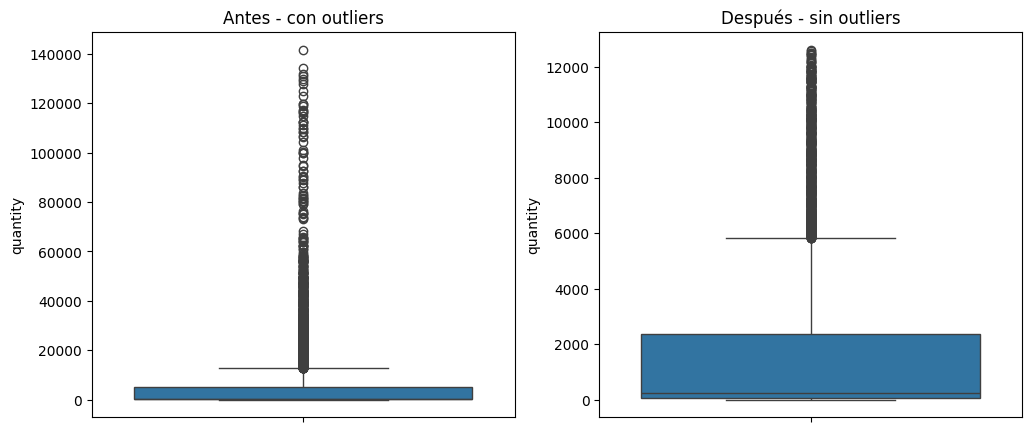

In [ ]:
# para verlo graficamente hago de nuevo el grafico de caja del antes y despúes y comparo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_facturas_compra["quantity"], ax=axes[0])
axes[0].set_title("Antes - con outliers")

sns.boxplot(y=df_quantity_sin_outliers["quantity"], ax=axes[1])
axes[1].set_title("Después - sin outliers")

plt.show()

Para dollars

In [21]:
# se obtienen los cuartiles 1 y 3 y se hace la ecuación de rango intercuartilico 

Q1 = df_quantity_sin_outliers["dollars"].quantile(0.25)
Q3 = df_quantity_sin_outliers["dollars"].quantile(0.75)
IQR = Q3 - Q1

# Se calculan los Límites inferior y superior de los outliers 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

Q1: 795.2850000000001
Q3: 24997.015
IQR: 24201.73
Límite inferior: -35507.31
Límite superior: 61299.61


In [22]:
# ahora identifico los valores outliers de la columna dollars
outliers = df_quantity_sin_outliers[
    (df_quantity_sin_outliers["dollars"] < limite_inferior) | 
    (df_quantity_sin_outliers["dollars"] > limite_superior)
]
# cuantos y cuales (primeros 5) son los valores outliers 
print(f"Número de outliers: {len(outliers)}")
outliers.head()

Número de outliers: 454


,vendor_number,vendor_name,invoice_date,po_number,po_date,pay_date,quantity,dollars,freight,approval
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,pendign
6,1128,BROWN-FORMAN CORP,2016-01-09,8150,2015-12-23,2016-02-19,4684,65403.57,1808.77,pendign
32,12546,JIM BEAM BRANDS COMPANY,2016-01-06,8142,2015-12-22,2016-02-19,11611,151890.49,3506.08,pendign
39,9552,M S WALKER INC,2016-01-10,8157,2015-12-23,2016-02-09,8061,68620.75,1591.50,pendign
52,17035,PERNOD RICARD USA,2016-01-05,8181,2015-12-24,2016-02-11,5772,80916.64,2703.94,pendign


In [24]:
# Ahora elimino los valores outliers de la columna dollars
df_dollars_sin_outliers = df_quantity_sin_outliers[
    (df_quantity_sin_outliers["dollars"] >= limite_inferior) &
    (df_quantity_sin_outliers["dollars"] <= limite_superior)
]
# muestro cuantos registros eran y cuantos quedan
print(f"Registros originales: {len(df_quantity_sin_outliers)}")
print(f"Registros sin outliers: {len(df_dollars_sin_outliers)}")

Registros originales: 4842
Registros sin outliers: 4388


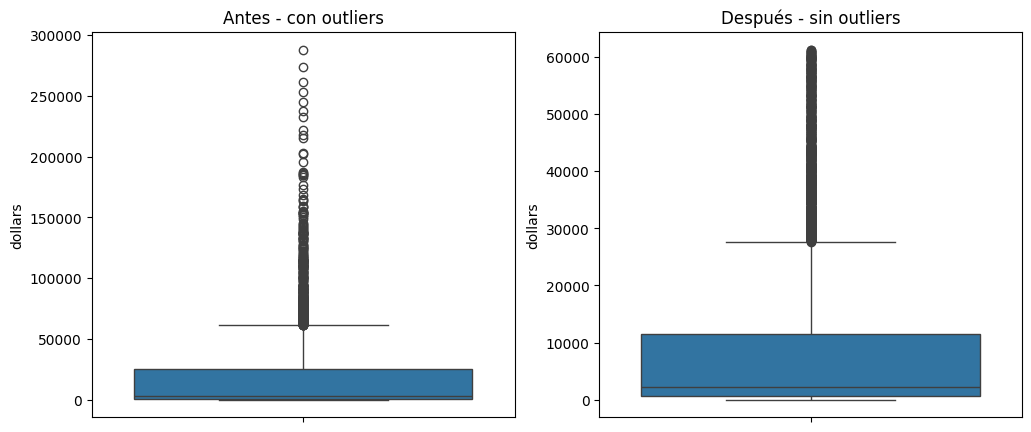

In [25]:
# para verlo graficamente hago de nuevo el grafico de caja del antes y despúes y comparo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_quantity_sin_outliers["dollars"], ax=axes[0])
axes[0].set_title("Antes - con outliers")

sns.boxplot(y=df_dollars_sin_outliers["dollars"], ax=axes[1])
axes[1].set_title("Después - sin outliers")

plt.show()

Para freight

In [26]:
# se obtienen los cuartiles 1 y 3 y se hace la ecuación de rango intercuartilico 

Q1 = df_dollars_sin_outliers["freight"].quantile(0.25)
Q3 = df_dollars_sin_outliers["freight"].quantile(0.75)
IQR = Q3 - Q1

# Se calculan los Límites inferior y superior de los outliers 
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

Q1: 3.56
Q3: 60.5875
IQR: 57.027499999999996
Límite inferior: -81.98124999999999
Límite superior: 146.12875


In [27]:
# ahora identifico los valores outliers de la columna freight
outliers = df_dollars_sin_outliers[
    (df_dollars_sin_outliers["freight"] < limite_inferior) | 
    (df_dollars_sin_outliers["freight"] > limite_superior)
]
# cuantos y cuales (primeros 5) son los valores outliers 
print(f"Número de outliers: {len(outliers)}")
outliers.head()

Número de outliers: 648


,vendor_number,vendor_name,invoice_date,po_number,po_date,pay_date,quantity,dollars,freight,approval
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,pendign
9,11567,CAMPARI AMERICA,2016-01-06,8151,2015-12-23,2016-02-20,1321,12039.71,398.71,pendign
11,1485,CASTLE BRANDS CORP.,2016-01-08,8152,2015-12-23,2016-02-19,320,5420.41,179.26,pendign
14,1392,CONSTELLATION BRANDS INC,2016-01-11,8108,2015-12-20,2016-02-10,8466,60281.13,1549.81,pendign
17,1590,DIAGEO CHATEAU ESTATE WINES,2016-01-12,8109,2015-12-20,2016-02-11,2246,14298.09,408.72,pendign


In [29]:
# Ahora elimino los valores outliers de la columna freight
df_sin_outliers = df_dollars_sin_outliers[
    (df_dollars_sin_outliers["freight"] >= limite_inferior) &
    (df_dollars_sin_outliers["freight"] <= limite_superior)
]
# muestro cuantos registros eran y cuantos quedan
print(f"Registros originales: {len(df_quantity_sin_outliers)}")
print(f"Registros sin outliers: {len(df_sin_outliers)}")

Registros originales: 4842
Registros sin outliers: 3740


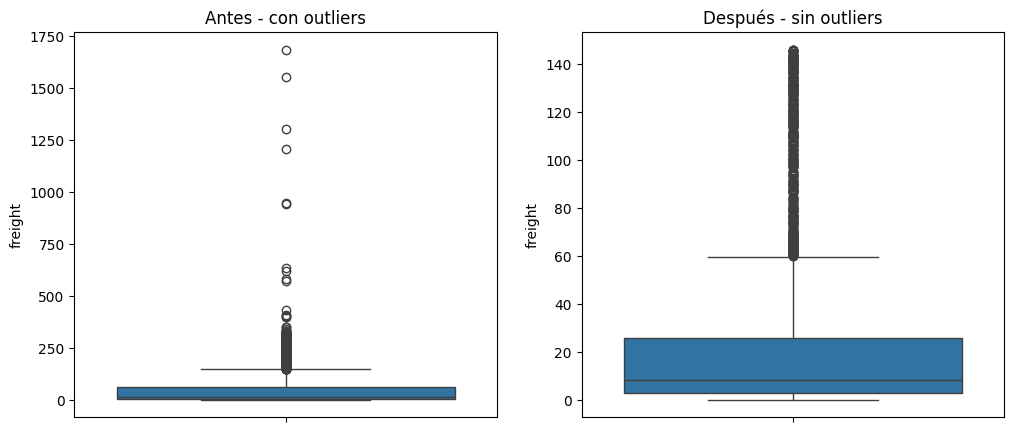

In [30]:
# para verlo graficamente hago de nuevo el grafico de caja del antes y despúes y comparo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_dollars_sin_outliers["freight"], ax=axes[0])
axes[0].set_title("Antes - con outliers")

sns.boxplot(y=df_sin_outliers["freight"], ax=axes[1])
axes[1].set_title("Después - sin outliers")

plt.show()

Guardo el dataset limpio y ajustado con el nombre que voy a utilizar la columna en el resto del análisis. pasa de ser "InvoicePurchases12312016.csv” a "Facturas_de_compra "

In [31]:
# Guardo el DF para cerrar el proceso de limpieza de datos

df_facturas_compra.to_csv('Facturas_de_compra.csv', index=False)